In [2]:
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
%matplotlib inline

'''signal and background files obtained from running 
/cluster/home/amyrewoldt/21.2.48/run/MVA_3lep.py for ttb and 800 H+ signal file'''

sig500_file = "/cluster/home/amyrewoldt/21.2.48/sig500-bdt.csv"
sig600_file = "/cluster/home/amyrewoldt/21.2.48/sig600-bdt.csv"
sig700_file = "/cluster/home/amyrewoldt/21.2.48/sig700-bdt.csv"
sig800_file = "/cluster/home/amyrewoldt/21.2.48/sig800-bdt.csv"
sig1000_file = "/cluster/home/amyrewoldt/21.2.48/sig1000-bdt.csv"
bkg_file = "/cluster/home/amyrewoldt/21.2.48/bkg-bdt.csv"

In [3]:
#higher level variables
mass_points = ['500GeV','600GeV','700GeV','800GeV','1000GeV']
variable = ["lepton_pt_l","MET_l","MT_l","Mll_l","DR_l"]

#add DR, check lepton pt for bkg

In [4]:
#read signal files
#for sig in sig_file:
    
df_sig500 = pd.read_csv(sig500_file,index_col=0)
df_sig600 = pd.read_csv(sig600_file,index_col=0)
df_sig700 = pd.read_csv(sig700_file,index_col=0)
df_sig800 = pd.read_csv(sig800_file,index_col=0)
df_sig1000 = pd.read_csv(sig1000_file,index_col=0)
df_sig = [df_sig500,df_sig600,df_sig700,df_sig800,df_sig1000]
df_bkg = pd.read_csv(bkg_file,index_col=0)

In [5]:
#tagging signal as 1
for sig in range(len(df_sig)):
    df_sig[sig]["signal"] = 1
df_sig[0]

,lepton_pt_l,MET_l,MT_l,Mll_l,DR_l,signal
0,23705.536894,113191.871427,155328.764799,18138.873636,1.459376,1
1,41014.284850,121224.054033,282198.480001,94255.149420,2.435094,1
2,18543.266757,105985.451523,164723.672466,48588.278891,2.881728,1
3,49284.745269,115638.399306,202431.506177,37271.078123,1.662717,1
4,100246.022899,172669.011572,402180.057783,37271.078123,1.662717,1
...,...,...,...,...,...,...
9994,60091.355976,109680.134250,192988.668279,38383.416250,1.345311,1
9995,79635.441004,103999.611290,230045.236893,30406.118928,0.956707,1
9996,172202.407025,232205.972976,592185.963077,24115.862732,0.519693,1
9997,31152.013230,216233.959987,403335.676123,22644.632360,2.122411,1


In [6]:
df_sig[1]

,lepton_pt_l,MET_l,MT_l,Mll_l,DR_l,signal
0,65299.171715,201210.741132,338359.647189,30273.746456,0.759542,1
1,2525.716244,163594.056266,274858.648137,26361.893831,1.595871,1
2,110692.955106,160849.766181,305866.052006,53241.048244,1.388918,1
3,46236.899841,62719.377616,207742.730676,84196.230640,2.788536,1
4,5894.687109,226188.219646,322604.193575,29723.250955,1.346386,1
...,...,...,...,...,...,...
9994,123001.700828,130402.358037,548514.897398,45540.245642,1.071288,1
9995,118828.517520,114975.334022,331713.171468,15560.209916,0.695260,1
9996,58068.665641,256875.354657,540045.710965,32657.484393,2.349249,1
9997,24089.269469,37761.324796,131637.487968,17202.068377,1.817892,1


In [7]:
df_sig[2]

,lepton_pt_l,MET_l,MT_l,Mll_l,DR_l,signal
0,89385.132811,47048.428632,204693.402361,28133.704432,0.505121,1
1,39266.563992,376131.857547,551360.168347,58426.683865,2.468424,1
2,41520.835801,343732.815318,402135.529912,18283.467112,1.279741,1
3,52648.141097,85548.325291,176271.874340,42811.091811,1.495950,1
4,169400.360066,182709.258115,479179.275670,42811.091811,1.495950,1
...,...,...,...,...,...,...
9994,137057.882618,79010.004602,288784.559107,36507.536105,0.471225,1
9995,114521.290192,180261.118369,348540.587390,14606.636376,0.407965,1
9996,108709.093844,49125.167072,195770.810851,54609.789345,0.870096,1
9997,82580.679272,218751.888200,427431.639685,30458.755444,0.731679,1


In [8]:
df_sig[3]

,lepton_pt_l,MET_l,MT_l,Mll_l,DR_l,signal
0,120326.067646,123768.832076,314970.450347,56695.567185,1.720359,1
1,60492.884939,163114.452533,309615.482133,56695.567185,1.720359,1
2,91953.997650,190778.456166,303759.822724,29129.130745,0.801793,1
3,42556.473045,78533.745330,166273.217822,35063.927202,1.204518,1
4,21348.086420,64799.181452,253581.309984,27478.120469,1.143946,1
...,...,...,...,...,...,...
9994,25328.886290,291772.423374,467284.753102,41898.564343,1.506551,1
9995,109969.551696,145219.672995,284711.443685,29929.827832,1.222148,1
9996,142098.802036,358186.262669,570409.703583,61077.053325,2.285710,1
9997,189385.471972,130948.174366,343290.720129,20113.619721,0.725889,1


In [9]:
df_sig[4]

,lepton_pt_l,MET_l,MT_l,Mll_l,DR_l,signal
0,82568.080492,222335.313416,392398.185877,138961.138526,3.512380,1
1,65993.715142,53720.729103,327830.734792,101724.739473,2.788618,1
2,78314.725254,51696.596681,222847.985929,110113.330292,2.692625,1
3,78021.849821,251946.239305,489828.350552,141571.802756,3.266377,1
4,145304.623513,153227.432475,521118.500823,154690.897886,2.782095,1
...,...,...,...,...,...,...
9994,217631.569675,349421.898467,663621.128375,33637.496205,0.388775,1
9995,51916.729775,205875.831621,327626.868800,50539.511057,1.264141,1
9996,192696.488752,439820.786471,759427.360446,50539.511057,1.264141,1
9997,110513.106800,377024.624149,557494.655907,30239.059548,0.750863,1


In [10]:
#tagging bkg as 0
df_bkg["signal"] = 0
df_bkg

,lepton_pt_l,MET_l,MT_l,Mll_l,DR_l,signal
0,60397.163158,80650.155730,143345.864336,12.753173,0.023759,0
1,36158.808554,11138.107907,145604.343214,12.753173,0.023759,0
2,114820.789565,31730.719436,182756.715142,24427.829852,4.519953,0
3,5008.424333,101448.067016,154672.738458,13471.895051,4.736649,0
4,74283.912383,24368.822529,99698.087175,30.201797,0.238406,0
...,...,...,...,...,...,...
8020,84888.246979,20999.143602,138195.730944,41636.684741,1.773135,0
8021,99444.343420,33281.332649,213085.715589,41636.684741,1.773135,0
8022,39424.229783,75273.879691,130930.081247,21654.563164,2.662456,0
8023,53249.148378,16841.370746,139347.344656,21654.563164,2.662456,0


500GeV
lepton_pt_l


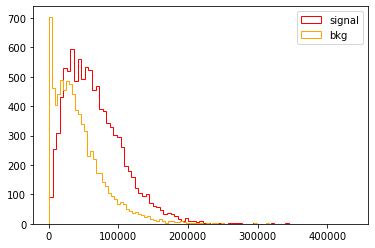

MET_l


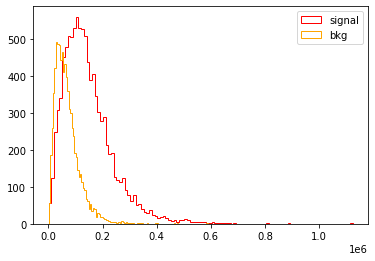

MT_l


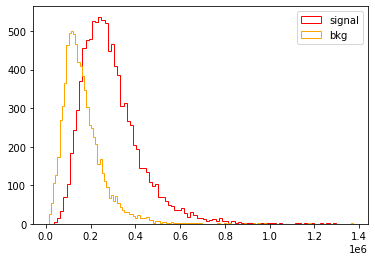

Mll_l


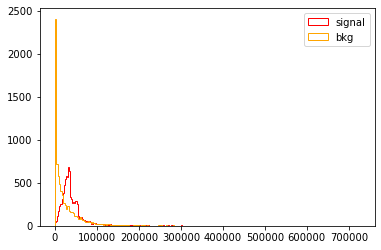

DR_l


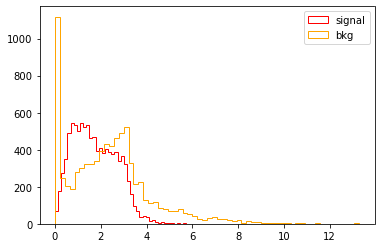

signal


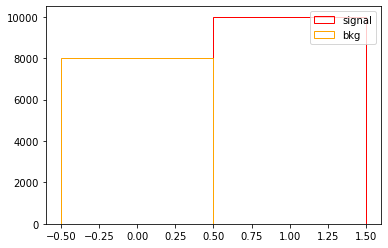

600GeV
lepton_pt_l


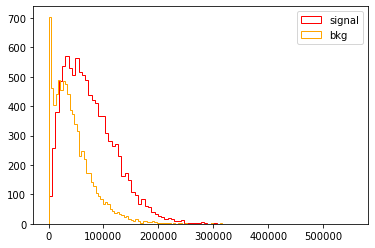

MET_l


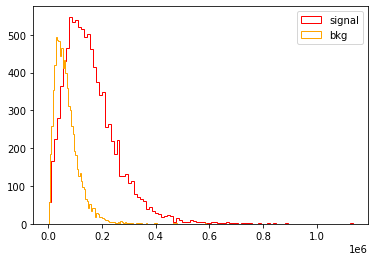

MT_l


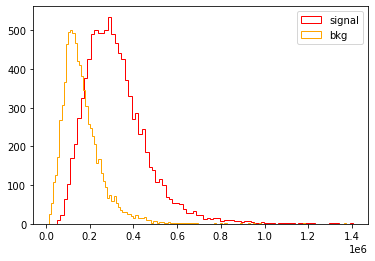

Mll_l


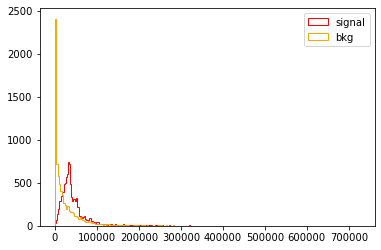

DR_l


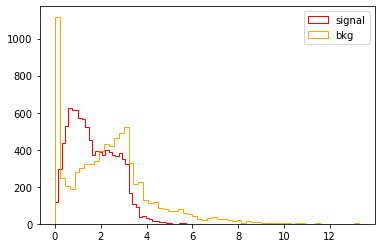

signal


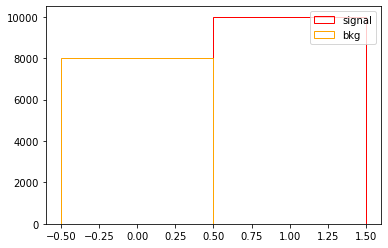

700GeV
lepton_pt_l


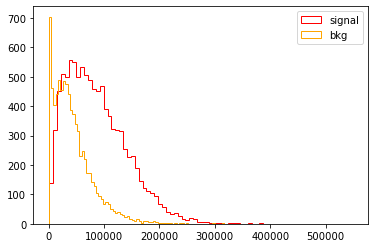

MET_l


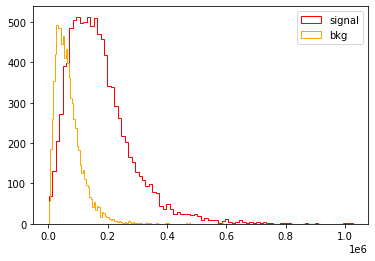

MT_l


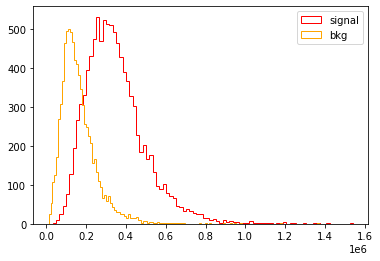

Mll_l


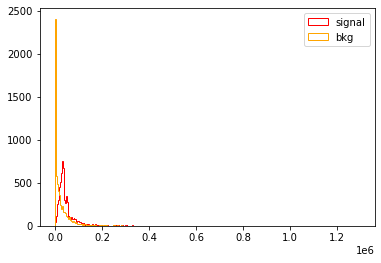

DR_l


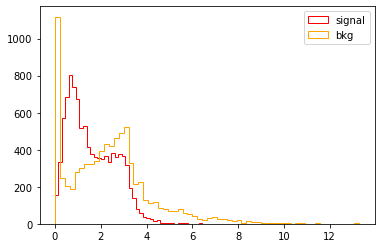

signal


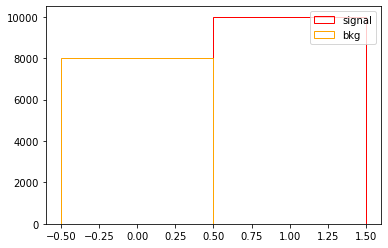

800GeV
lepton_pt_l


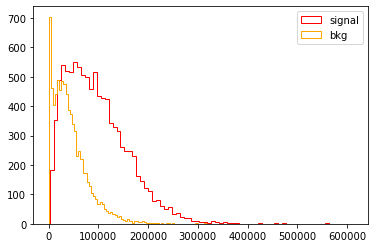

MET_l


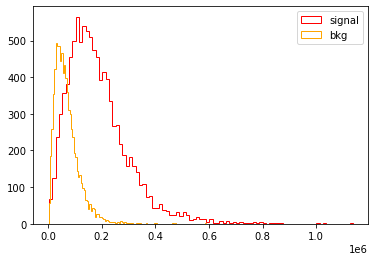

MT_l


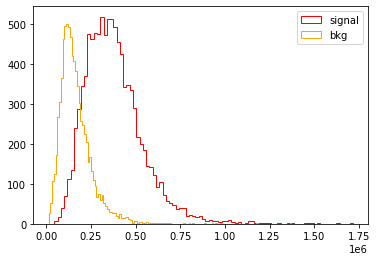

Mll_l


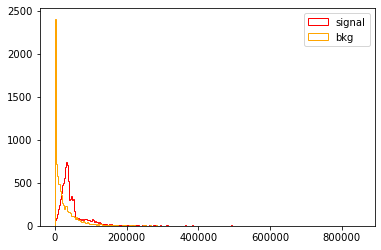

DR_l


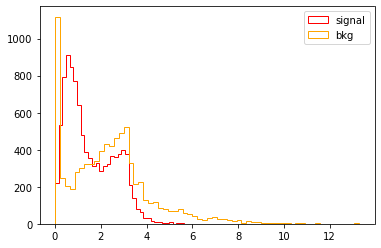

signal


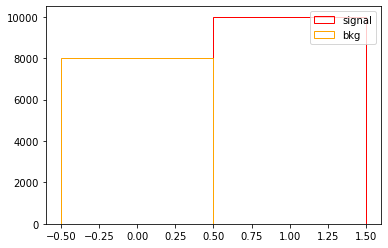

1000GeV
lepton_pt_l


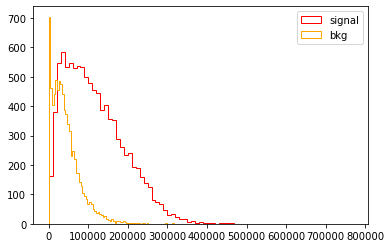

MET_l


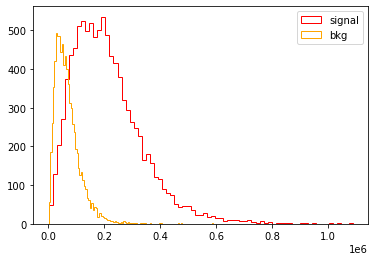

MT_l


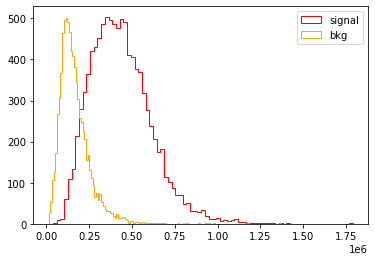

Mll_l


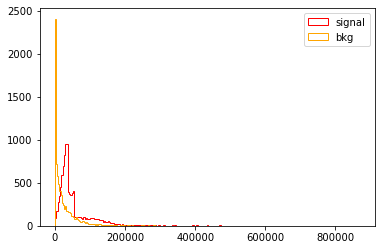

DR_l


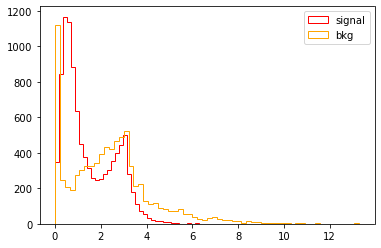

signal


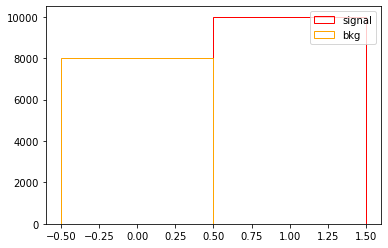

In [23]:
#overlay signal and background for variables list
for sig in range(len(df_sig)):
    print(mass_points[sig])
    for var in df_sig[sig].columns:
        print(var)
        plt.figure()
        plt.hist(df_sig[sig][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        plt.hist(df_bkg[var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.legend(loc='upper right')
        plt.show()

In [24]:
#standardize stuff function
min_max_scaler = preprocessing.MinMaxScaler()

def standardize_stuff(n):
    return (n - n.min())/(n.max() - n.min())

In [25]:
#standardize signal stuff
series_list_500 = []
for var in df_sig[0].columns:
    print(var)
    if var == "signal":
        series_list_500.append(df_sig[0][var])
        continue
    #    if "flavor" or "charge" in var:
    #        series_list.append(df_sig[var])
    #        continue
    print (df_sig[0][var])
    print (df_sig[0][var].min())
    print (df_sig[0][var].max())
    print (standardize_stuff(df_sig[0][var]))
    print (series_list_500.append((df_sig[0][var] - df_sig[0][var].min())/(df_sig[0][var].max() - df_sig[0][var].min())))

df_norm_sig500 = pd.DataFrame(series_list_500).T

lepton_pt_l
0        23705.536894
1        41014.284850
2        18543.266757
3        49284.745269
4       100246.022899
            ...      
9994     60091.355976
9995     79635.441004
9996    172202.407025
9997     31152.013230
9998     40649.856715
Name: lepton_pt_l, Length: 9999, dtype: float64
736.1638148312211
436857.0330992711
0       0.052667
1       0.092355
2       0.040831
3       0.111319
4       0.228170
          ...   
9994    0.136098
9995    0.180911
9996    0.393162
9997    0.069742
9998    0.091520
Name: lepton_pt_l, Length: 9999, dtype: float64
None
MET_l
0       113191.871427
1       121224.054033
2       105985.451523
3       115638.399306
4       172669.011572
            ...      
9994    109680.134250
9995    103999.611290
9996    232205.972976
9997    216233.959987
9998    119418.281218
Name: MET_l, Length: 9999, dtype: float64
521.0631889284834
1124699.3134637366
0       0.100225
1       0.107370
2       0.093815
3       0.102401
4       0.153132
          

In [26]:
#standardize signal stuff
series_list_600 = []
for var in df_sig[1].columns:
    print(var)
    if var == "signal":
        series_list_600.append(df_sig[1][var])
        continue
    #    if "flavor" or "charge" in var:
    #        series_list.append(df_sig[var])
    #        continue
    print (df_sig[1][var])
    print (df_sig[1][var].min())
    print (df_sig[1][var].max())
    print (standardize_stuff(df_sig[1][var]))
    print (series_list_600.append((df_sig[1][var] - df_sig[1][var].min())/(df_sig[1][var].max() - df_sig[1][var].min())))

df_norm_sig600 = pd.DataFrame(series_list_600).T

lepton_pt_l
0        65299.171715
1         2525.716244
2       110692.955106
3        46236.899841
4         5894.687109
            ...      
9994    123001.700828
9995    118828.517520
9996     58068.665641
9997     24089.269469
9998    176909.823831
Name: lepton_pt_l, Length: 9999, dtype: float64
424.6679898295934
554018.5749824567
0       0.117188
1       0.003795
2       0.199186
3       0.082754
4       0.009881
          ...   
9994    0.221420
9995    0.213882
9996    0.104127
9997    0.042747
9998    0.318799
Name: lepton_pt_l, Length: 9999, dtype: float64
None
MET_l
0       201210.741132
1       163594.056266
2       160849.766181
3        62719.377616
4       226188.219646
            ...      
9994    130402.358037
9995    114975.334022
9996    256875.354657
9997     37761.324796
9998     37885.791439
Name: MET_l, Length: 9999, dtype: float64
1255.4179090498144
1135341.2961848094
0       0.176314
1       0.143145
2       0.140725
3       0.054197
4       0.198338
         

In [27]:
#standardize signal stuff
series_list_700 = []
for var in df_sig[2].columns:
    print(var)
    if var == "signal":
        series_list_700.append(df_sig[2][var])
        continue
    #    if "flavor" or "charge" in var:
    #        series_list.append(df_sig[var])
    #        continue
    print (df_sig[2][var])
    print (df_sig[2][var].min())
    print (df_sig[2][var].max())
    print (standardize_stuff(df_sig[2][var]))
    print (series_list_700.append((df_sig[2][var] - df_sig[2][var].min())/(df_sig[2][var].max() - df_sig[2][var].min())))

df_norm_sig700 = pd.DataFrame(series_list_700).T

lepton_pt_l
0        89385.132811
1        39266.563992
2        41520.835801
3        52648.141097
4       169400.360066
            ...      
9994    137057.882618
9995    114521.290192
9996    108709.093844
9997     82580.679272
9998     82580.679272
Name: lepton_pt_l, Length: 9999, dtype: float64
1021.662467151216
548929.7632702023
0       0.161274
1       0.069802
2       0.073916
3       0.094225
4       0.307312
          ...   
9994    0.248283
9995    0.207151
9996    0.196543
9997    0.148855
9998    0.148855
Name: lepton_pt_l, Length: 9999, dtype: float64
None
MET_l
0        47048.428632
1       376131.857547
2       343732.815318
3        85548.325291
4       182709.258115
            ...      
9994     79010.004602
9995    180261.118369
9996     49125.167072
9997    218751.888200
9998    218751.888200
Name: MET_l, Length: 9999, dtype: float64
1957.7396896027803
1026148.5058308662
0       0.044026
1       0.365336
2       0.333703
3       0.081616
4       0.176482
         

In [28]:
#standardize signal stuff
series_list_800 = []
for var in df_sig[3].columns:
    print(var)
    if var == "signal":
        series_list_800.append(df_sig[3][var])
        continue
    #    if "flavor" or "charge" in var:
    #        series_list.append(df_sig[var])
    #        continue
    print (df_sig[3][var])
    print (df_sig[3][var].min())
    print (df_sig[3][var].max())
    print (standardize_stuff(df_sig[3][var]))
    print (series_list_800.append((df_sig[3][var] - df_sig[3][var].min())/(df_sig[3][var].max() - df_sig[3][var].min())))

df_norm_sig800 = pd.DataFrame(series_list_800).T

lepton_pt_l
0       120326.067646
1        60492.884939
2        91953.997650
3        42556.473045
4        21348.086420
            ...      
9994     25328.886290
9995    109969.551696
9996    142098.802036
9997    189385.471972
9998     73236.905984
Name: lepton_pt_l, Length: 9999, dtype: float64
2141.126580136904
611433.0605786915
0       0.193971
1       0.095770
2       0.147405
3       0.066332
4       0.031523
          ...   
9994    0.038057
9995    0.176973
9996    0.229705
9997    0.307315
9998    0.116686
Name: lepton_pt_l, Length: 9999, dtype: float64
None
MET_l
0       123768.832076
1       163114.452533
2       190778.456166
3        78533.745330
4        64799.181452
            ...      
9994    291772.423374
9995    145219.672995
9996    358186.262669
9997    130948.174366
9998     87242.125644
Name: MET_l, Length: 9999, dtype: float64
2769.5905435768286
1137390.630067104
0       0.106643
1       0.141320
2       0.165702
3       0.066775
4       0.054670
          

In [37]:
#standardize signal stuff
series_list_1000 = []
for var in df_sig[4].columns:
    print(var)
    if var == "signal":
        series_list_1000.append(df_sig[4][var])
        continue
    #    if "flavor" or "charge" in var:
    #        series_list.append(df_sig[var])
    #        continue
    print (df_sig[4][var])
    print (df_sig[4][var].min())
    print (df_sig[4][var].max())
    print (standardize_stuff(df_sig[4][var]))
    print (series_list_1000.append((df_sig[4][var] - df_sig[4][var].min())/(df_sig[4][var].max() - df_sig[4][var].min())))

df_norm_sig1000 = pd.DataFrame(series_list_1000).T

lepton_pt_l
0        82568.080492
1        65993.715142
2        78314.725254
3        78021.849821
4       145304.623513
            ...      
9994    217631.569675
9995     51916.729775
9996    192696.488752
9997    110513.106800
9998    117844.478312
Name: lepton_pt_l, Length: 9999, dtype: float64
841.6572093072219
768469.4436506449
0       0.106466
1       0.084875
2       0.100925
3       0.100544
4       0.188194
          ...   
9994    0.282415
9995    0.066536
9996    0.249932
9997    0.142871
9998    0.152421
Name: lepton_pt_l, Length: 9999, dtype: float64
None
MET_l
0       222335.313416
1        53720.729103
2        51696.596681
3       251946.239305
4       153227.432475
            ...      
9994    349421.898467
9995    205875.831621
9996    439820.786471
9997    377024.624149
9998    244703.872806
Name: MET_l, Length: 9999, dtype: float64
1209.7587068982896
1088924.7392930517
0       0.203294
1       0.048276
2       0.046416
3       0.230517
4       0.139759
         

In [38]:
#standardize bkg stuff
series_list_bkg = []
for var in df_bkg.columns:
    print(var)
    if var == "signal":
        series_list_bkg.append(df_bkg[var])
        continue
#    print (df_sig[var])
    print(df_bkg[var].min())
    print(df_bkg[var].max())
    print (standardize_stuff(df_bkg[var]))
    print (series_list_bkg.append((df_bkg[var] - df_bkg[var].min())/(df_bkg[var].max() - df_bkg[var].min())))

df_norm_bkg = pd.DataFrame(series_list_bkg).T

lepton_pt_l
29.99718644350808
316428.25396043976
0       0.190795
1       0.114188
2       0.362805
3       0.015735
4       0.234685
          ...   
8020    0.268201
8021    0.314206
8022    0.124508
8023    0.168203
8024    0.167628
Name: lepton_pt_l, Length: 8025, dtype: float64
None
MET_l
1411.4916997033256
589178.9336409008
0       0.134813
1       0.016548
2       0.051584
3       0.170198
4       0.039059
          ...   
8020    0.033326
8021    0.054222
8022    0.125666
8023    0.026252
8024    0.242703
Name: MET_l, Length: 8025, dtype: float64
None
MT_l
12128.896906375754
1371677.4651687972
0       0.096515
1       0.098176
2       0.125503
3       0.104846
4       0.064410
          ...   
8020    0.092727
8021    0.147811
8022    0.087383
8023    0.093574
8024    0.138156
Name: MT_l, Length: 8025, dtype: float64
None
Mll_l
-239.33322956787808
724883.3724167041
0       0.000348
1       0.000348
2       0.034018
3       0.018909
4       0.000372
          ...   
8020    0.05

In [39]:
df_norm_bkg

,lepton_pt_l,MET_l,MT_l,Mll_l,DR_l,signal
0,0.190795,0.134813,0.096515,0.000348,0.001785,0.0
1,0.114188,0.016548,0.098176,0.000348,0.001785,0.0
2,0.362805,0.051584,0.125503,0.034018,0.340072,0.0
3,0.015735,0.170198,0.104846,0.018909,0.356376,0.0
4,0.234685,0.039059,0.064410,0.000372,0.017935,0.0
...,...,...,...,...,...,...
8020,0.268201,0.033326,0.092727,0.057750,0.133406,0.0
8021,0.314206,0.054222,0.147811,0.057750,0.133406,0.0
8022,0.124508,0.125666,0.087383,0.030193,0.200317,0.0
8023,0.168203,0.026252,0.093574,0.030193,0.200317,0.0


In [40]:
df_norm_sig = [df_norm_sig500,df_norm_sig600,df_norm_sig700,df_norm_sig800,df_norm_sig1000]

500GeV
lepton_pt_l


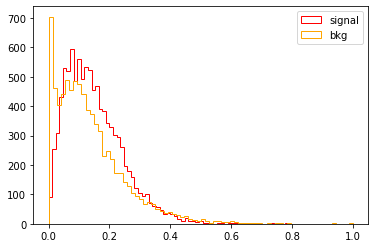

MET_l


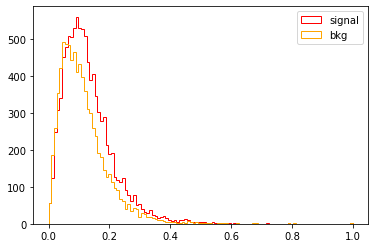

MT_l


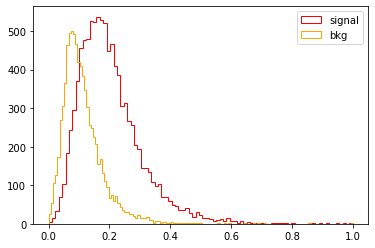

Mll_l


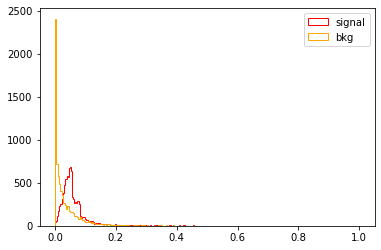

DR_l


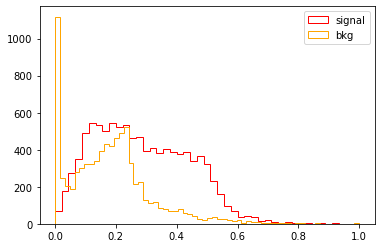

signal


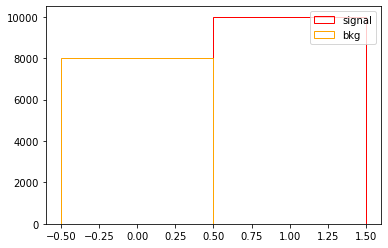

600GeV
lepton_pt_l


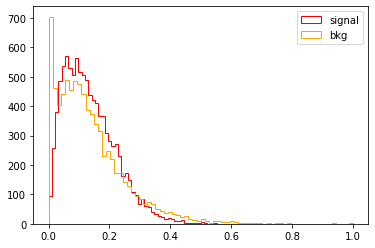

MET_l


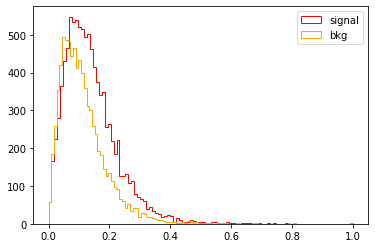

MT_l


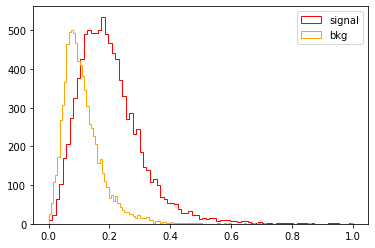

Mll_l


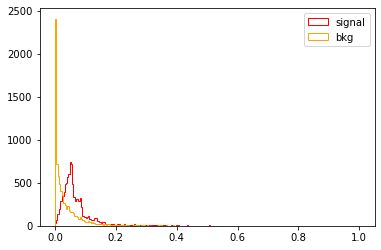

DR_l


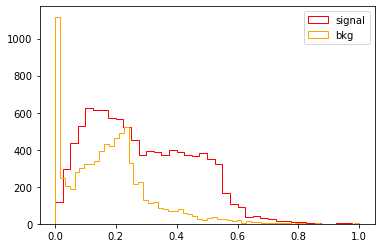

signal


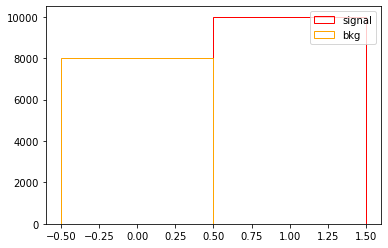

700GeV
lepton_pt_l


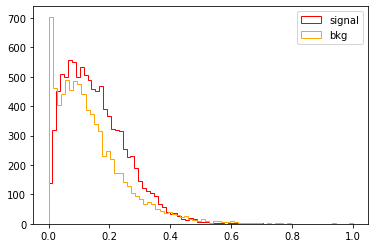

MET_l


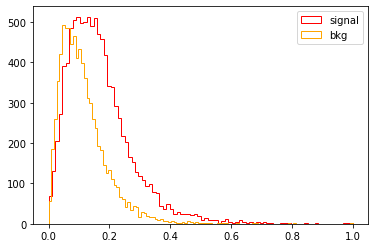

MT_l


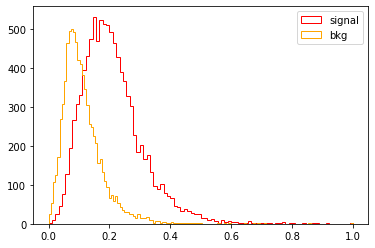

Mll_l


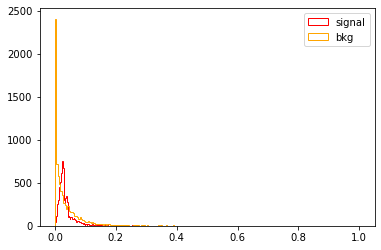

DR_l


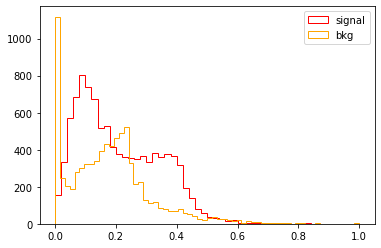

signal


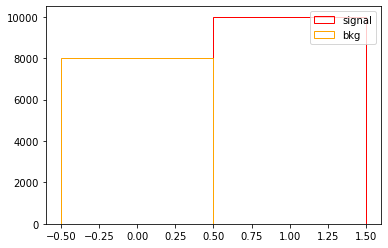

800GeV
lepton_pt_l


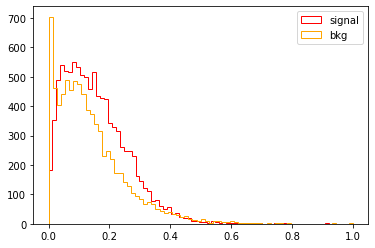

MET_l


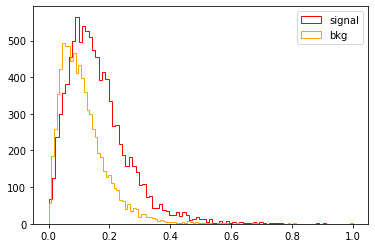

MT_l


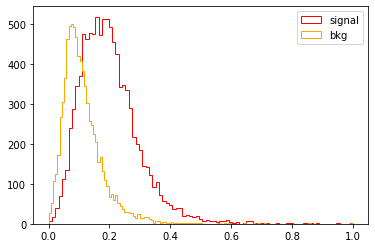

Mll_l


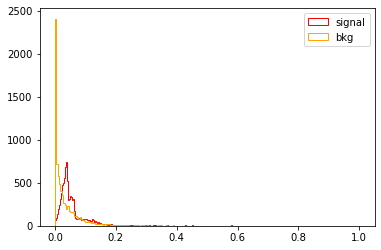

DR_l


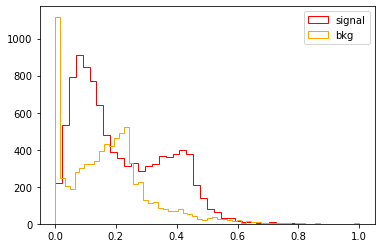

signal


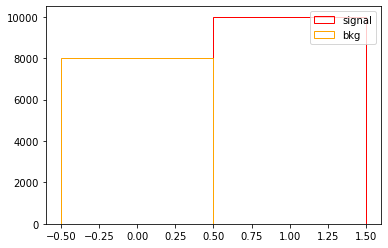

1000GeV
lepton_pt_l


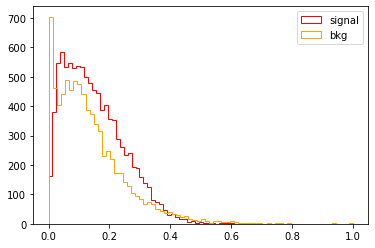

MET_l


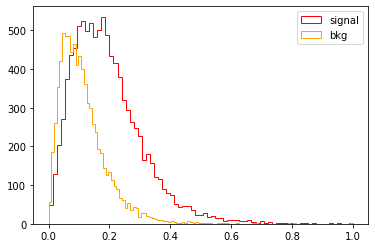

MT_l


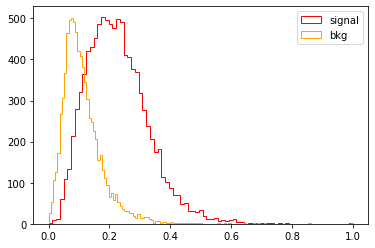

Mll_l


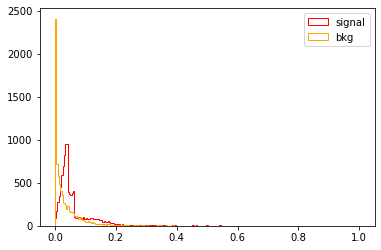

DR_l


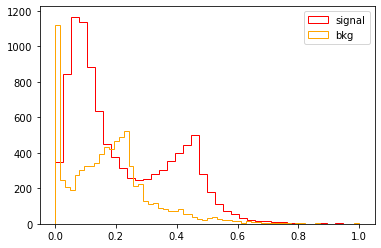

signal


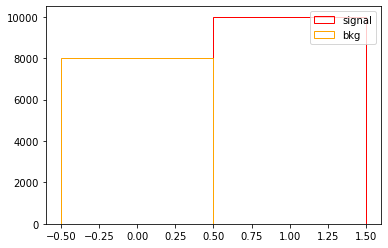

In [41]:
#Overlay standardized signal and bkg
for sig in range(len(df_sig)):
    print(mass_points[sig])
    for var in df_sig[sig].columns:
        print(var)
        plt.figure()
        plt.hist(df_norm_sig[sig][var],bins="auto",histtype="step", color="red",label="signal",stacked=True)
        plt.hist(df_norm_bkg[var],bins="auto",histtype="step", color="orange",label="bkg",stacked=True)
        plt.legend(loc='upper right')
        plt.show()

In [42]:
### Beginning of DT ###
from sklearn import tree

n_bkg = int(8026*80/100)
n_sig = int(9999*80/100)

df_train_500 = pd.concat([df_norm_sig[0].iloc[:n_sig],df_norm_bkg.iloc[:n_bkg]])
df_test_500 =  pd.concat([df_norm_sig[0].iloc[n_sig:],df_norm_bkg.iloc[n_bkg:]])

#shuffle rows
df_train_500 = sklearn.utils.shuffle(df_train_500)
df_test_500 = sklearn.utils.shuffle(df_test_500)

#Reindex [0:n]
x_train_500 = df_train_500[variable].reset_index(drop=True)
y_train_500 = df_train_500["signal"].reset_index(drop=True)

x_test_500 = df_test_500[variable].reset_index(drop=True)
y_test_500 = df_test_500["signal"].reset_index(drop=True)

In [43]:

n_bkg = int(8026*80/100)
n_sig = int(9999*80/100)

df_train_600 = pd.concat([df_norm_sig[1].iloc[:n_sig],df_norm_bkg.iloc[:n_bkg]])
df_test_600 =  pd.concat([df_norm_sig[1].iloc[n_sig:],df_norm_bkg.iloc[n_bkg:]])

#shuffle rows
df_train_600 = sklearn.utils.shuffle(df_train_600)
df_test_600 = sklearn.utils.shuffle(df_test_600)

#Reindex [0:n]
x_train_600 = df_train_600[variable].reset_index(drop=True)
y_train_600 = df_train_600["signal"].reset_index(drop=True)

x_test_600 = df_test_600[variable].reset_index(drop=True)
y_test_600 = df_test_600["signal"].reset_index(drop=True)

In [44]:
#using 80% of the (signal + bkg) data for training and the rest for test

n_bkg = int(8026*80/100)
n_sig = int(9999*80/100)

df_train_700 = pd.concat([df_norm_sig[2].iloc[:n_sig],df_norm_bkg.iloc[:n_bkg]])
df_test_700 =  pd.concat([df_norm_sig[2].iloc[n_sig:],df_norm_bkg.iloc[n_bkg:]])

#shuffle rows
df_train_700 = sklearn.utils.shuffle(df_train_700)
df_test_700 = sklearn.utils.shuffle(df_test_700)

#Reindex [0:n]
x_train_700 = df_train_700[variable].reset_index(drop=True)
y_train_700 = df_train_700["signal"].reset_index(drop=True)

x_test_700 = df_test_700[variable].reset_index(drop=True)
y_test_700 = df_test_700["signal"].reset_index(drop=True)

In [45]:
#using 80% of the (signal + bkg) data for training and the rest for test

n_bkg = int(8026*80/100)
n_sig = int(9999*80/100)

df_train_800 = pd.concat([df_norm_sig[3].iloc[:n_sig],df_norm_bkg.iloc[:n_bkg]])
df_test_800 =  pd.concat([df_norm_sig[3].iloc[n_sig:],df_norm_bkg.iloc[n_bkg:]])

#shuffle rows
df_train_800 = sklearn.utils.shuffle(df_train_800)
df_test_800 = sklearn.utils.shuffle(df_test_800)

#Reindex [0:n]
x_train_800 = df_train_800[variable].reset_index(drop=True)
y_train_800 = df_train_800["signal"].reset_index(drop=True)

x_test_800 = df_test_800[variable].reset_index(drop=True)
y_test_800 = df_test_800["signal"].reset_index(drop=True)

In [46]:
#using 80% of the (signal + bkg) data for training and the rest for test

n_bkg = int(8026*80/100)
n_sig = int(9999*80/100)

df_train_1000 = pd.concat([df_norm_sig[4].iloc[:n_sig],df_norm_bkg.iloc[:n_bkg]])
df_test_1000 =  pd.concat([df_norm_sig[4].iloc[n_sig:],df_norm_bkg.iloc[n_bkg:]])

#shuffle rows
df_train_1000 = sklearn.utils.shuffle(df_train_1000)
df_test_1000 = sklearn.utils.shuffle(df_test_1000)

#Reindex [0:n]
x_train_1000 = df_train_1000[variable].reset_index(drop=True)
y_train_1000 = df_train_1000["signal"].reset_index(drop=True)

x_test_1000 = df_test_1000[variable].reset_index(drop=True)
y_test_1000 = df_test_1000["signal"].reset_index(drop=True)

In [47]:
df_train = [df_train_500,df_train_600,df_train_700,df_train_800,df_train_1000]
df_test = [df_test_500,df_test_600,df_test_700,df_test_800,df_test_1000]
x_train = [x_train_500,x_train_600,x_train_700,x_train_800,x_train_1000]
y_train = [y_train_500,y_train_600,y_train_700,y_train_800,y_train_1000]
x_test = [x_test_500,x_test_600,x_test_700,x_test_800,x_test_1000]
y_test = [y_test_500,y_test_600,y_test_700,y_test_800,y_test_1000]

In [48]:
from sklearn import tree
tree_model_500 = tree.DecisionTreeClassifier()
tree_model_500 = tree_model_500.fit(x_train[0],y_train[0])

In [49]:
from sklearn import tree
tree_model_600 = tree.DecisionTreeClassifier()
tree_model_600 = tree_model_600.fit(x_train[1],y_train[1])

In [50]:
from sklearn import tree
tree_model_700 = tree.DecisionTreeClassifier()
tree_model_700 = tree_model_700.fit(x_train[2],y_train[2])

In [51]:
from sklearn import tree
tree_model_800 = tree.DecisionTreeClassifier()
tree_model_800 = tree_model_800.fit(x_train[3],y_train[3])

In [54]:
from sklearn import tree
tree_model_1000 = tree.DecisionTreeClassifier()
tree_model_1000 = tree_model_1000.fit(x_train[4],y_train[4])

In [55]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
y_predict_tree_500 = tree_model_500.predict(x_test[0])
fpr_500,tpr_500,t_500 = roc_curve(y_test[0],y_predict_tree_500)
auc_tree_500 = auc(fpr_500,tpr_500)

In [56]:

y_predict_tree_600 = tree_model_600.predict(x_test[1])
fpr_600,tpr_600,t_600 = roc_curve(y_test[1],y_predict_tree_600)
auc_tree_600 = auc(fpr_600,tpr_600)

In [57]:

y_predict_tree_700 = tree_model_700.predict(x_test[2])
fpr_700,tpr_700,t_700 = roc_curve(y_test[2],y_predict_tree_700)
auc_tree_700 = auc(fpr_700,tpr_700)

In [58]:

y_predict_tree_800 = tree_model_800.predict(x_test[3])
fpr_800,tpr_800,t_800 = roc_curve(y_test[3],y_predict_tree_800)
auc_tree_800 = auc(fpr_800,tpr_800)

In [59]:
y_predict_tree_1000 = tree_model_1000.predict(x_test[4])
fpr_1000,tpr_1000,t_1000 = roc_curve(y_test[4],y_predict_tree_1000)
auc_tree_1000 = auc(fpr_1000,tpr_1000)

In [60]:
for y in range(len(y_test)):
    print(mass_points[y])
    print(y_test[y])

500GeV
0       1.0
1       0.0
2       0.0
3       1.0
4       0.0
       ... 
3600    0.0
3601    0.0
3602    0.0
3603    1.0
3604    0.0
Name: signal, Length: 3605, dtype: float64
600GeV
0       0.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
3600    0.0
3601    0.0
3602    0.0
3603    1.0
3604    1.0
Name: signal, Length: 3605, dtype: float64
700GeV
0       1.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
3600    0.0
3601    0.0
3602    0.0
3603    0.0
3604    0.0
Name: signal, Length: 3605, dtype: float64
800GeV
0       0.0
1       0.0
2       0.0
3       1.0
4       1.0
       ... 
3600    1.0
3601    1.0
3602    1.0
3603    1.0
3604    0.0
Name: signal, Length: 3605, dtype: float64
1000GeV
0       1.0
1       0.0
2       1.0
3       1.0
4       1.0
       ... 
3600    1.0
3601    1.0
3602    1.0
3603    1.0
3604    0.0
Name: signal, Length: 3605, dtype: float64


500GeV


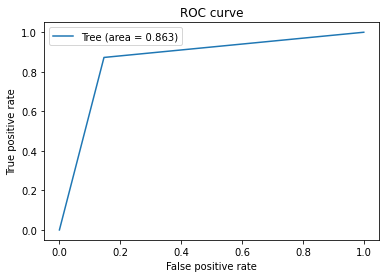

In [63]:
plt.figure()
print(mass_points[0])
plt.plot(fpr_500, tpr_500, label='Tree (area = {:.3f})'.format(auc_tree_500))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

600GeV


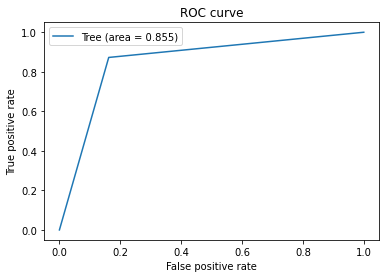

In [64]:
plt.figure()
print(mass_points[1])
plt.plot(fpr_600, tpr_600, label='Tree (area = {:.3f})'.format(auc_tree_600))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

700GeV


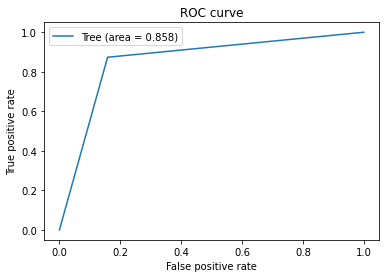

In [65]:
plt.figure()
print(mass_points[2])
plt.plot(fpr_700, tpr_700, label='Tree (area = {:.3f})'.format(auc_tree_700))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

800GeV


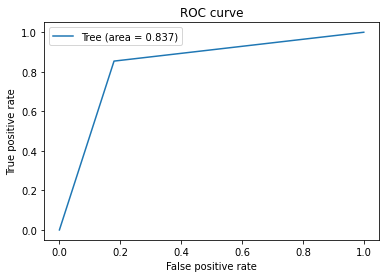

In [66]:
plt.figure()
print(mass_points[3])
plt.plot(fpr_800, tpr_800, label='Tree (area = {:.3f})'.format(auc_tree_800))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

1000GeV


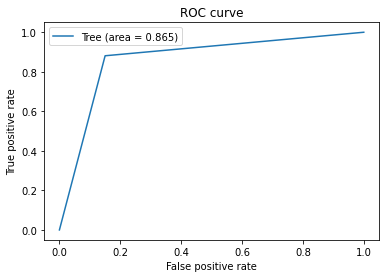

In [67]:
plt.figure()
print(mass_points[4])
plt.plot(fpr_1000, tpr_1000, label='Tree (area = {:.3f})'.format(auc_tree_1000))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [70]:
auc_tree = [auc_tree_500,auc_tree_600,auc_tree_700,auc_tree_800,auc_tree_1000]

In [71]:
area_table_dt = pd.DataFrame({'mass_{H+}':mass_points,
                          'area':auc_tree})
area_table_dt

,mass_{H+},area
0,500GeV,0.863041
1,600GeV,0.855253
2,700GeV,0.857622
3,800GeV,0.837280
4,1000GeV,0.865422


In [17]:
#I guess a BDT below

In [73]:
#from https://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting
from sklearn.ensemble import GradientBoostingClassifier

GDC_500 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.6,
                                 max_depth=5, random_state=0).fit(x_train[0], y_train[0])
GDC_500.score(x_test[0],y_test[0])

0.9045769764216366

In [74]:

GDC_600 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.6,
                                 max_depth=5, random_state=0).fit(x_train[1], y_train[1])
GDC_600.score(x_test[1],y_test[1])

0.897364771151179

In [75]:

GDC_700 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.6,
                                 max_depth=5, random_state=0).fit(x_train[2], y_train[2])
GDC_700.score(x_test[2],y_test[2])

0.9054091539528433

In [76]:

GDC_800 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.6,
                                 max_depth=5, random_state=0).fit(x_train[3], y_train[3])
GDC_800.score(x_test[3],y_test[3])

0.8859916782246879

In [77]:

GDC_1000 = GradientBoostingClassifier(n_estimators=500, learning_rate=0.6,
                                 max_depth=5, random_state=0).fit(x_train[4], y_train[4])
GDC_1000.score(x_test[4],y_test[4])

0.9092926490984743

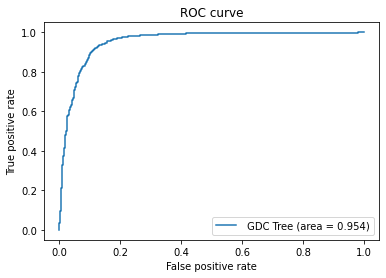

In [79]:
y_predict_gdc_500 = GDC_500.predict_proba(x_test[0])[:,1]
fpr_gdc_500,tpr_gdc_500,t_500 = roc_curve(y_test[0],y_predict_gdc_500)
auc_gdc_500 = auc(fpr_gdc_500,tpr_gdc_500)

plt.figure()

plt.plot(fpr_gdc_500, tpr_gdc_500, label=' GDC Tree (area = {:.3f})'.format(auc_gdc_500))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

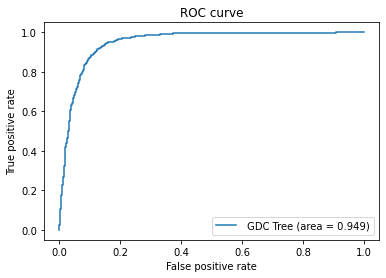

In [80]:
y_predict_gdc_600 = GDC_600.predict_proba(x_test[1])[:,1]
fpr_gdc_600,tpr_gdc_600,t_600 = roc_curve(y_test[1],y_predict_gdc_600)
auc_gdc_600 = auc(fpr_gdc_600,tpr_gdc_600)

plt.figure()

plt.plot(fpr_gdc_600, tpr_gdc_600, label=' GDC Tree (area = {:.3f})'.format(auc_gdc_600))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

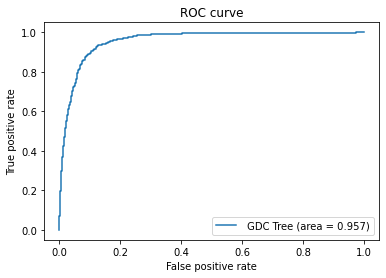

In [82]:
y_predict_gdc_700 = GDC_700.predict_proba(x_test[2])[:,1]
fpr_gdc_700,tpr_gdc_700,t_700 = roc_curve(y_test[2],y_predict_gdc_700)
auc_gdc_700 = auc(fpr_gdc_700,tpr_gdc_700)

plt.figure()

plt.plot(fpr_gdc_700, tpr_gdc_700, label=' GDC Tree (area = {:.3f})'.format(auc_gdc_700))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

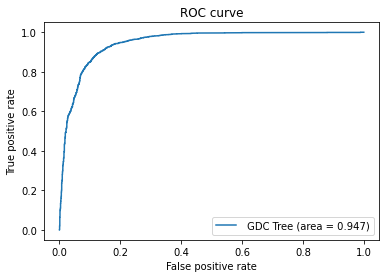

In [83]:
y_predict_gdc_800 = GDC_800.predict_proba(x_test[3])[:,1]
fpr_gdc_800,tpr_gdc_800,t_800 = roc_curve(y_test[3],y_predict_gdc_800)
auc_gdc_800 = auc(fpr_gdc_800,tpr_gdc_800)

plt.figure()

plt.plot(fpr_gdc_800, tpr_gdc_800, label=' GDC Tree (area = {:.3f})'.format(auc_gdc_800))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

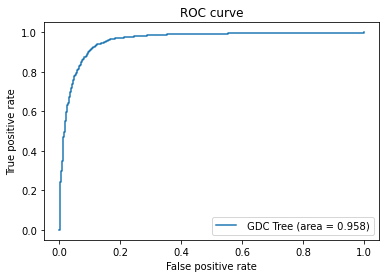

In [84]:
y_predict_gdc_1000 = GDC_1000.predict_proba(x_test[4])[:,1]
fpr_gdc_1000,tpr_gdc_1000,t_1000 = roc_curve(y_test[4],y_predict_gdc_1000)
auc_gdc_1000 = auc(fpr_gdc_1000,tpr_gdc_1000)

plt.figure()

plt.plot(fpr_gdc_1000, tpr_gdc_1000, label=' GDC Tree (area = {:.3f})'.format(auc_gdc_1000))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [88]:
auc_gdc = [auc_gdc_500,auc_gdc_600,auc_gdc_700,auc_gdc_800,auc_gdc_1000]

In [89]:
area_table_gdc = pd.DataFrame({'mass_{H+}':mass_points,
                          'area':auc_gdc})
area_table_gdc

,mass_{H+},area
0,500GeV,0.953803
1,600GeV,0.949067
2,700GeV,0.957406
3,800GeV,0.946918
4,1000GeV,0.958160


In [20]:
#classifiers for extra trees - assuming 2 bdt's working in parallel but no idea otherwise

In [21]:
from sklearn.ensemble import ExtraTreesClassifier 

tree_2 = ExtraTreesClassifier(verbose=1,n_estimators=50)

In [22]:
tree_2.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


ExtraTreesClassifier(n_estimators=50, verbose=1)

In [23]:
tree_2.score(x_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


0.8970873786407767